<a href="https://colab.research.google.com/github/richardyusuf/riceys/blob/master/quickstarts/Get_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Ganti 'path_ke_file_anda.csv' dengan lokasi file dataset pisang Anda
# Jika belum punya, Anda bisa membuat dummy data atau mengunggah file banana_ripeness.csv
try:
    df = pd.read_csv('banana_ripeness_data.csv')
except:
    # Contoh data sederhana jika file belum ada (untuk simulasi)
    data = {
        'panjang': np.random.uniform(10, 20, 100),
        'tekstur_softness': np.random.uniform(1, 10, 100),
        'warna_kuning': np.random.uniform(0, 100, 100),
        'label': np.random.choice(['Mentah', 'Matang', 'Terlalu Matang'], 100)
    }
    df = pd.DataFrame(data)

# Preprocessing: Mengubah label teks menjadi angka
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Membagi data menjadi fitur (X) dan target (y)
X = df.drop('label', axis=1)
y = df['label']

# Splitting: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model SVM
model = SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print(f"Akurasi Model: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nLaporan Detail:\n", classification_report(y_test, y_pred))

Akurasi Model: 45.00%

Laporan Detail:
               precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.60      0.55      0.57        11
           2       0.00      0.00      0.00         5

    accuracy                           0.45        20
   macro avg       0.33      0.43      0.36        20
weighted avg       0.40      0.45      0.41        20



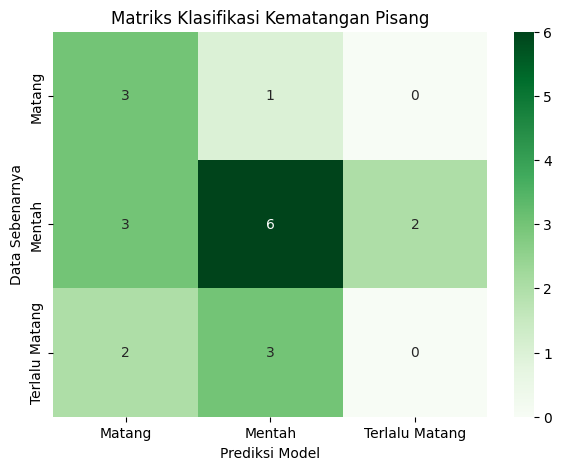

In [ ]:
# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriks Klasifikasi Kematangan Pisang')
plt.xlabel('Prediksi Model')
plt.ylabel('Data Sebenarnya')
plt.show()

In [ ]:
# @title Licensed under the Apache License, Version 2.0 (the "License");
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini API: Getting started with Gemini models

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

---
> **Gemini 3 Pro/Flash**: If you are only interested in the new [Gemini 3 models](https://ai.google.dev/gemini-api/docs/gemini-3) new capabilities ([thinking levels](#thinking_level), [media resolution](#media_resolution) and [thoughts signatures](#thoughts_signature), jump directly to the [dedicated section](#gemini3) at the end of this notebook.

---


The **[Google Gen AI SDK](https://github.com/googleapis/python-genai)** provides a unified interface to [Gemini models](https://ai.google.dev/gemini-api/docs/models) through both the [Gemini Developer API](https://ai.google.dev/gemini-api/docs) and the Gemini API on [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview). With a few exceptions, code that runs on one platform will run on both. This notebook uses the Developer API.

This notebook will walk you through:

* [Installing and setting-up](#setup) the Google GenAI SDK
* [Text](#text_prompt) and [multimodal](#multimodal_prompt) prompting
* Setting [system instructions](#system_instructions)
* Control the [thinking](#thinking) process
* Counting [tokens](#count_tokens)
* Configuring [safety filters](#safety_filters)
* Initiating a [multi-turn chat](#chat)
* Generating a [content stream](#stream) and sending [asynchronous](#async) requests
* [Controlling generated output](#json)
* Using [function calling](#function_calling)
* Grounding your requests using [file uploads](#file_api), [Google Search](#search_grounding), [Google Maps](#maps), [Youtube](#youtube_link) or by add [URLs](#url_context) to you prompt
* Using [context caching](#caching)
* Generating [text embeddings](#embeddings)

More details about the SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks).

Feature-specific models have their own dedicated guides:
* Podcast and speech generation using [Gemini TTS ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_TTS.ipynb),
* Live interaction with [Gemini Live ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_LiveAPI.ipynb),
* Image generation using [Imagen ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_imagen.ipynb),
* Video generation using [Veo ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_Veo.ipynb),
* Music generation using [Lyria RealTime ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_LyriaRealTime.ipynb).

<a name="setup"></a>
## Setup

### Install SDK

Install the SDK from [PyPI](https://github.com/googleapis/python-genai). It's recommended to always use the latest version.

In [ ]:
%pip install -U -q 'google-genai>=1.51.0' # 1.51 is needed for Gemini 3 pro thinking levels support

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.6/426.6 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.9/234.9 kB 10.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires google-auth==2.43.0, but you have google-auth 2.47.0 which is incompatible.


### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GEMINI_API_KEY`. If you don't already have an API key or you aren't sure how to create a Colab Secret, see [Authentication ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Authentication.ipynb) for an example.

In [ ]:
from google.colab import userdata

GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

SecretNotFoundError: Secret GEMINI_API_KEY does not exist.

### Initialize SDK client

With the new SDK, now you only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [ ]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GEMINI_API_KEY)

### Choose a model

Select the model you want to use in this guide. You can either select one from the list or enter a model name manually. Keep in mind that some models, such as the 2.5 ones are thinking models and thus take slightly more time to respond. For more details, you can see [thinking notebook ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_thinking.ipynb) to learn how to control the thinking.

Feel free to select [Gemini 3 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-3-pro) if you want to try our newest model, but keep in mind that it has no free tier.

For a full overview of all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini).

In [ ]:
MODEL_ID = "gemini-2.5-flash" # @param ["gemini-2.5-flash-lite", "gemini-2.5-flash", "gemini-2.5-pro", "gemini-3-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

<a name="text_prompt"></a>
## Send text prompts

Use the `generate_content` method to generate responses to your prompts. You can pass text directly to `generate_content` and use the `.text` property to get the text content of the response. Note that the `.text` field will work when there's only one part in the output.

In [ ]:
from IPython.display import Markdown

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?"
)

display(Markdown(response.text))

<a name="system_instructions"></a>
## Add system instructions

You can also add system instructions to give the model direction on how to respond and which persona it should use. This is especially useful for mixture-of-experts models like the the pro models.

In [ ]:
system_instruction = "You are a pirate and are explaining things to 5 years old kids."

response = client.models.generate_content(
    model=MODEL_ID,
    contents="What's the largest planet in our solar system?",
    config=types.GenerateContentConfig(
        system_instruction=system_instruction,
    )
)

display(Markdown(response.text))


<a name="count_tokens"></a>
## Count tokens

Tokens are the basic inputs to the Gemini models. You can use the `count_tokens` method to calculate the number of input tokens before sending a request to the Gemini API.

In [ ]:
response = client.models.count_tokens(
    model=MODEL_ID,
    contents="What's the highest mountain in Africa?",
)

print(f"This prompt was worth {response.total_tokens} tokens.")

<a name="parameters"></a>
## Configure model parameters

You can include parameter values in each call that you send to a model to control how the model generates a response.

Learn more about [experimenting with parameter values](https://ai.google.dev/gemini-api/docs/prompting-strategies#model-parameters) in the documentation.

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents="Tell me how the internet works, but pretend I'm a puppy who only understands squeaky toys.",
    config=types.GenerateContentConfig(
        temperature=0.4, # Temperature of 1 is strongly recommended for Gemini 3 Pro
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        stop_sequences=["STOP!"],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    )
)

display(Markdown(response.text))

<a name="thinking"></a>
## Control the thinking process

All models since the 2.5 generation are thinking models, which means that they are first analysing your request, strategizing about how to answer and only afterwards starting to answer you. This is very useful for complex requests but at the cost of some latency.

Check the [dedicated guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_thinking.ipynb) for more details.

### Check the thought process

By adding the `include_thoughts=True` option in the config, you can check the though proces of the model.

In [ ]:
prompt = "A man moves his car to an hotel and tells the owner he’s bankrupt. Why?"

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

for part in response.parts:
  if not part.text:
    continue
  if part.thought:
    display(Markdown("### Thought summary:"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("### Answer:"))
    display(Markdown(part.text))
    print()

print(f"We used {response.usage_metadata.thoughts_token_count} tokens for the thinking phase and {response.usage_metadata.prompt_token_count} for the output.")

### Disable thinking

On flash and flash-lite models, you can disable the thinking by setting its `thinking_budget` to 0.

In [ ]:
if "-pro" not in MODEL_ID:
  response = client.models.generate_content(
    model=MODEL_ID,
    contents="Quicky tell me a joke about unicorns.",
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        thinking_budget=0
      )
    )
  )

  display(Markdown(response.text))

Inversely, you can also use `thinking_budget` to set it even higher (up to 24576 tokens).

For Gemini 3, please check the [dedicated section](#thinking_level) at the end of this guide.

<a name="multimodal_prompt"></a>
## Send multimodal prompts

Use Gemini model, a multimodal model that supports multimodal prompts. You can include text, [PDF documents ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/PDF_Files.ipynb), images, [audio ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Audio.ipynb) and [videos ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../quickstarts/Video.ipynb) in your prompt requests and get text or code responses. Check the [File API](#file_api) section below for more examples.

In this first example, you'll download an image from a specified URL, save it as a byte stream and then write those bytes to a local file named `jetpack.png`.

In [ ]:
import requests
import pathlib
from PIL import Image

IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png" # @param {type: "string"}

img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

Now send the image, and ask Gemini to generate a short blog post based on it.

In [ ]:
from IPython.display import display, Markdown
image = Image.open(img_path)
image.thumbnail([512,512])

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        image,
        "Write a short and engaging blog post based on this picture."
    ]
)

display(image)
Markdown(response.text)

<a name="images"></a>
## Generate Images

Gemini can output images directly as part of a conversation using the [Image generation ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Image_out.ipynb) models (aka "Nano-banana).

In [ ]:
from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.5-flash-image",
    contents='Hi, can you create a 3d rendered image of a pig with wings and a top hat flying over a happy futuristic scifi city with lots of greenery?',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    generated_image = part.as_image()
    generated_image.show()


<a name="safety_filters"></a>
## Configure safety filters

The Gemini API provides safety filters that you can adjust across multiple filter categories to restrict or allow certain types of content. You can use these filters to adjust what is appropriate for your use case. See the [Configure safety filters](https://ai.google.dev/gemini-api/docs/safety-settings) documentation for details.


In this example, you'll use a safety filter to only block highly dangerous content, when requesting the generation of potentially disrespectful phrases.

In [ ]:
prompt = """
    Write a list of 2 disrespectful things that I might say to the universe after stubbing my toe in the dark.
"""

safety_settings = [
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT",
        threshold="BLOCK_ONLY_HIGH",
    ),
]

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
        safety_settings=safety_settings,
    ),
)

Markdown(response.text)

<a name="chat"></a>
## Start a multi-turn chat

The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [ ]:
system_instruction = """
  You are an expert software developer and a helpful coding assistant.
  You are able to generate high-quality code in any programming language.
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

Use `chat.send_message` to pass a message back and receive a response.

In [ ]:
response = chat.send_message("Write a function that checks if a year is a leap year.")

Markdown(response.text)

Here's another example using your new helpful coding assistant:

In [ ]:
response = chat.send_message("Okay, write a unit test of the generated function.")

Markdown(response.text)

### Save and resume a chat

Most objects in the Python SDK are implemented as [Pydantic models](https://docs.pydantic.dev/latest/concepts/models/). As Pydantic has a number of features for serializing and deserializing objects, you can use them for persistence.

This example shows how to save and restore a [`Chat`](https://googleapis.github.io/python-genai/genai.html#genai.chats.Chat) session using JSON.

In [ ]:
from pydantic import TypeAdapter

# Chat history is a list of Content objects. A TypeAdapter can convert to and from
# these Pydantic types.
history_adapter = TypeAdapter(list[types.Content])

# Use the chat object from the previous section.
chat_history = chat.get_history()

# Convert to a JSON list.
json_history = history_adapter.dump_json(chat_history)

At this point you can save the JSON bytestring to disk or wherever you persist data. When you load it again, you can instantiate a new chat session using the stored history.

In [ ]:
# Convert the JSON back to the Pydantic schema.
history = history_adapter.validate_json(json_history)

# Now load a new chat session using the JSON history.
new_chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
    history=history,
)

response = new_chat.send_message("What was the name of the function again?")
Markdown(response.text)

<a name="json"></a>
## Generate JSON

The [controlled generation](https://ai.google.dev/gemini-api/docs/structured-output?lang=python#generate-json) (aka. "Structured output") capability in Gemini API allows you to constraint the model output to a structured format. You can provide the schemas as Pydantic Models or a JSON string.

You can find more examples of controlled generation in the [dedicated notebook ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./JSON.ipynb).

In [ ]:
from pydantic import BaseModel
import json

class Recipe(BaseModel):
    recipe_name: str
    recipe_description: str
    recipe_ingredients: list[str]

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Provide a popular cookie recipe and its ingredients.",
    config=types.GenerateContentConfig(
        response_mime_type="application/json",
        response_schema=Recipe,
    ),
)

print(json.dumps(json.loads(response.text), indent=4))

[Image ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_imagen.ipynb) is another way to generate images. See the [documentation](https://ai.google.dev/gemini-api/docs/image-generation#choose-a-model) for recommendations on where to use each one.

<a name="stream"></a>
## Generate content stream

By default, the model returns a response after completing the entire generation process. You can also use the `generate_content_stream` method to stream the response as it's being generated, and the model will return chunks of the response as soon as they're generated.

Note that if you're using a thinking model, it'll only start streaming after finishing its thinking process.

In [ ]:
for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents="Tell me a story about a lonely robot who finds friendship in a most unexpected place."
):
  print(chunk.text, end="")

<a name="async"></a>
## Send asynchronous requests

`client.aio` exposes all the analogous async methods that are available on `client`.

For example, `client.aio.models.generate_content` is the async version of `client.models.generate_content`.

More details in the [dedicated guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./asynchronous_requests.ipynb).

In [ ]:
response = await client.aio.models.generate_content(
    model=MODEL_ID,
    contents="Compose a song about the adventures of a time-traveling squirrel."
)

Markdown(response.text)

<a name="file_api"></a>
## Upload files

Now that you've seen how to send multimodal prompts, try uploading files to the API of different multimedia types. For small images, such as the previous multimodal example, you can point the Gemini model directly to a local file when providing a prompt. When you've larger files, many files, or files you don't want to send over and over again, you can use the [File Upload API](https://ai.google.dev/gemini-api/docs/files), and then pass the file by reference.

More examples and details in the [File API guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./File-API.ipynb), or the guides dedicated to [Audio![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Audio.ipynb), [Video![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Video_understanding.ipynb) or [Image/Spatial![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Spatial_understanding.ipynb) understanding.

### Upload a large text file

Let's start by uploading a text file. In this case, you'll use a 400 page transcript from [Apollo 11](https://www.nasa.gov/history/alsj/a11/a11trans.html).

In [ ]:
# Prepare the file to be uploaded
TEXT = "https://storage.googleapis.com/generativeai-downloads/data/a11.txt"  # @param {type: "string"}
text_bytes = requests.get(TEXT).content

text_path = pathlib.Path('a11.txt')
text_path.write_bytes(text_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=text_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you give me a summary of this information please?",
    ]
)

Markdown(response.text)

### Upload an image file

You can also upload images so that it's easier to use them multiple time.


In [ ]:
# Prepare the file to be uploaded
IMG = "https://storage.googleapis.com/generativeai-downloads/data/jetpack.png"  # @param {type: "string"}
img_bytes = requests.get(IMG).content

img_path = pathlib.Path('jetpack.png')
img_path.write_bytes(img_bytes)

media_resolution = 'MEDIA_RESOLUTION_HIGH' # @param ['MEDIA_RESOLUTION_UNSPECIFIED','MEDIA_RESOLUTION_LOW','MEDIA_RESOLUTION_MEDIUM','MEDIA_RESOLUTION_HIGH']
# You can also use types.MediaResolution.MEDIA_RESOLUTION_LOW/MEDIUM/HIGH

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=img_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Write a short and engaging blog post based on this picture.",
    ],
    config=types.GenerateContentConfig(
        media_resolution=media_resolution
    )
)

Markdown(response.text)

The previous example was also using `media_resolution` to tell the model if it if should

You'll find a lot of examples of the image analysis capabilities of the Gemini models in the [Spatial understanding ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Spatial_understanding.ipynb) notebook.

### Upload a PDF file

This PDF page is an article titled [Smoothly editing material properties of objects](https://research.google/blog/smoothly-editing-material-properties-of-objects-with-text-to-image-models-and-synthetic-data/) with text-to-image models and synthetic data available on the Google Research Blog.

Firstly you'll download a the PDF file from an URL and save it locally as "article.pdf

In [ ]:
# Prepare the file to be uploaded
PDF = "https://storage.googleapis.com/generativeai-downloads/data/Smoothly%20editing%20material%20properties%20of%20objects%20with%20text-to-image%20models%20and%20synthetic%20data.pdf"  # @param {type: "string"}
pdf_bytes = requests.get(PDF).content

pdf_path = pathlib.Path('article.pdf')
pdf_path.write_bytes(pdf_bytes)

Secondly, you'll upload the saved PDF file and generate a bulleted list summary of its contents.

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=pdf_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Can you summarize this file as a bulleted list?",
    ]
)

Markdown(response.text)

### Upload an audio file

In this case, you'll use a [sound recording](https://www.jfklibrary.org/asset-viewer/archives/jfkwha-006) of President John F. Kennedy’s 1961 State of the Union address.

In [ ]:
# Prepare the file to be uploaded
AUDIO = "https://storage.googleapis.com/generativeai-downloads/data/State_of_the_Union_Address_30_January_1961.mp3"  # @param {type: "string"}
audio_bytes = requests.get(AUDIO).content

audio_path = pathlib.Path('audio.mp3')
audio_path.write_bytes(audio_bytes)

In [ ]:
# Upload the file using the API
file_upload = client.files.upload(file=audio_path)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        file_upload,
        "Listen carefully to the following audio file. Provide a brief summary",
    ]
)

Markdown(response.text)

### Upload a video file

In this case, you'll use a short clip of [Big Buck Bunny](https://peach.blender.org/about/).

In [ ]:
# Download the video file
VIDEO_URL = "https://storage.googleapis.com/generativeai-downloads/videos/Big_Buck_Bunny.mp4"  # @param {type: "string"}
video_file_name = "BigBuckBunny_320x180.mp4"
!wget -O {video_file_name} $VIDEO_URL

Let's start by uploading the video file.

In [ ]:
# Upload the file using the API
video_file = client.files.upload(file=video_file_name)
print(f"Completed upload: {video_file.uri}")

> **Note:** The state of the video is important. The video must finish processing, so do check the state. Once the state of the video is `ACTIVE`, you're able to pass it into `generate_content`.

In [ ]:
import time

# Check the file processing state
while video_file.state == "PROCESSING":
    print('Waiting for video to be processed.')
    time.sleep(10)
    video_file = client.files.get(name=video_file.name)

if video_file.state == "FAILED":
  raise ValueError(video_file.state)
print(f'Video processing complete: ' + video_file.uri)

In [ ]:
print(video_file.state)

In [ ]:
# Ask Gemini about the video
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        video_file,
        "Describe this video.",
    ]
)

Markdown(response.text)

<a name="grounding"></a>
## Grounding

The Gemini API give you multiple ways to ground your requests, including Google search, maps, youtube, and url context.

For more details information and examples, check the [Grounding ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Grounding.ipynb) notebook.

<a name="search_grounding"></a>
### Ground your requests with Google Search

Google Search grounding is particularly useful for queries that require current information or external knowledge.

To enable Google Search, simply add the `google_search` tool in the `generate_content`'s `config`:

In [ ]:
from IPython.display import Markdown, HTML, display

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Who's the current Magic the gathering world champion?",
    config={"tools": [{"google_search": {}}]},
)

# print the response
display(Markdown(f"**Response**:\n {response.text}"))
# print the search details
print(f"Search Query: {response.candidates[0].grounding_metadata.web_search_queries}")
# urls used for grounding
print(f"Search Pages: {', '.join([site.web.title for site in response.candidates[0].grounding_metadata.grounding_chunks])}")

display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

Note that you should always display the grounding `rendered_content` when using search grounding.

Check out the [Search grounding ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Search_grounding.ipynb) dedicated guide for more details and examples.

<a name="maps"></a>
### Use Google Maps grounding

[Google Maps grounding](https://ai.google.dev/gemini-api/docs/maps-grounding) allows you to easily incorporate location-aware functionality into your applications. When a prompt has context related to Maps data, the Gemini model uses Google Maps to provide factually accurate and fresh answers that are relevant to the specified location or general area.

To enable grounding with Google Maps, add the `google_maps` tool in the  `config` argument of `generate_content`, and optionally provide a structured location in the `tool_config`.

**Note that Gemini 3 models currently don't support Maps grounding.**

In [ ]:
if not MODEL_ID.startswith("gemini-3"):
  from IPython.display import Markdown

  response = client.models.generate_content(
      model=MODEL_ID,
      contents="Do any cafes around here do a good flat white? I will walk up to 20 minutes away",
      config=types.GenerateContentConfig(
          tools=[types.Tool(google_maps=types.GoogleMaps())],
          tool_config=types.ToolConfig(
              retrieval_config=types.RetrievalConfig(
                  lat_lng=types.LatLng(latitude=40.7680797, longitude=-73.9818957) # Columbus Circle in New York - https://maps.app.goo.gl/hsQpspc8Vt3AXSrX7
              )
          ),
      ),
  )

  display(Markdown(f"### Response\n {response.text}"))

All grounded outputs require sources to be displayed after the response text. This code snippet will display the sources.

In [ ]:
def generate_sources(response: types.GenerateContentResponse):
  grounding = response.candidates[0].grounding_metadata
  # You only need to display sources that were part of the grounded response.
  supported_chunk_indices = {i for support in grounding.grounding_supports for i in support.grounding_chunk_indices}

  sources = []
  if supported_chunk_indices:
    sources.append("### Sources from Google Maps")
  for i in supported_chunk_indices:
    ref = grounding.grounding_chunks[i].maps
    sources.append(f"- [{ref.title}]({ref.uri})")

  return "\n".join(sources)


display(Markdown(generate_sources(response)))

More details, inlcuding how to render the contextual Google Maps widget, check the [Google maps ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Grounding.ipynb#maps_grounding) section of the grounding notebook.

<a name="youtube_link"></a>
### Process a YouTube link

For YouTube links, you don't need to explicitly upload the video file content, but you do need to explicitly declare the video URL you want the model to process as part of the `contents` of the request. For more information see the [documentation](https://ai.google.dev/gemini-api/docs/video-understanding#youtube) including the features and limits.

> **Note:** You're only able to submit up to one YouTube link per `generate_content` request.

> **Note:** If your text input includes YouTube links, the system won't process them, which may result in incorrect responses. To ensure proper handling, explicitly provide the URL using the `file_uri` parameter in `FileData`.

The following example shows how you can use the model to summarize the video. In this case use a summary video of [Google I/O 2025]("https://www.youtube.com/watch?v=LxvErFkBXPk").

In [ ]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents= types.Content(
        parts=[
            types.Part(text="Summarize this video of Google I/O 2025."),
            types.Part(
                file_data=types.FileData(file_uri='https://www.youtube.com/watch?v=LxvErFkBXPk')
            )
        ]
    )
)

display(Markdown(response.text))

<a name="URL_context"></a>
### Use URL context

The URL Context tool empowers Gemini models to directly access, process, and understand content from user-provided web page URLs. This is key for enabling dynamic agentic workflows, allowing models to independently research, analyze articles, and synthesize information from the web as part of their reasoning process.

In this example you will use two links as reference and ask Gemini to find differences between the cook receipes present in each of the links:

In [ ]:
prompt = """
  Compare recipes from https://www.food.com/recipe/homemade-cream-of-broccoli-soup-271210
  and from https://www.allrecipes.com/recipe/13313/best-cream-of-broccoli-soup/,
  list the key differences between them.
"""

tools = []
tools.append(types.Tool(url_context=types.UrlContext))

client = genai.Client(api_key=GEMINI_API_KEY)
config = types.GenerateContentConfig(
    tools=tools,
)

response = client.models.generate_content(
      contents=[prompt],
      model=MODEL_ID,
      config=config
)

Markdown(response.text)

<a name="function_calling"></a>
## Function calling

[Function calling](https://ai.google.dev/gemini-api/docs/function-calling) lets you provide a set of tools that it can use to respond to the user's prompt. You create a description of a function in your code, then pass that description to a language model in a request. The response from the model includes:
- The name of a function that matches the description.
- The arguments to call it with.

More details and examples in the [function calling guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Function_calling.ipynb).

In [ ]:
get_destination = types.FunctionDeclaration(
    name="get_destination",
    description="Get the destination that the user wants to go to",
    parameters={
        "type": "OBJECT",
        "properties": {
            "destination": {
                "type": "STRING",
                "description": "Destination that the user wants to go to",
            },
        },
    },
)

destination_tool = types.Tool(
    function_declarations=[get_destination],
)

response = client.models.generate_content(
    model=MODEL_ID,
    contents="I'd like to travel to Paris.",
    config=types.GenerateContentConfig(
        tools=[destination_tool],
        temperature=0,
        ),
)

response.candidates[0].content.parts[0].function_call

You can also use [MCP servers](https://ai.google.dev/gemini-api/docs/function-calling#mcp).

<a name="code_execution"></a>
## Code execution

[Code execution](https://ai.google.dev/gemini-api/docs/code-execution?lang=python) lets the model generate and execute Python code to answer complex questions.

You can find more examples in the [Code execution guide  ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Code_execution.ipynb).

In [ ]:
from IPython.display import Image, Markdown, Code, HTML

response = client.models.generate_content(
    model=MODEL_ID,
    contents="Generate and run a script to count how many letter r there are in the word strawberry",
    config = types.GenerateContentConfig(
        tools=[types.Tool(code_execution=types.ToolCodeExecution)]
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  if part.executable_code is not None:
    code_html = f'<pre style="background-color: green;">{part.executable_code.code}</pre>'
    display(HTML(code_html))
  if part.code_execution_result is not None:
    display(Markdown(part.code_execution_result.output))
  if part.inline_data is not None:
    display(Image(data=part.inline_data.data, format="png"))
  display(Markdown("---"))

<a name="caching"></a>
## Use context caching

[Context caching](https://ai.google.dev/gemini-api/docs/caching?lang=python) lets you to store frequently used input tokens in a dedicated cache and reference them for subsequent requests, eliminating the need to repeatedly pass the same set of tokens to a model. You can find more caching examples [in the dedicated guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Caching.ipynb).

Note that for models older than 2.5, you needed to use fixed version models (often ending with `-001`).

#### Create a cache

In [ ]:
system_instruction = """
  You are an expert researcher who has years of experience in conducting systematic literature surveys and meta-analyses of different topics.
  You pride yourself on incredible accuracy and attention to detail. You always stick to the facts in the sources provided, and never make up new facts.
  Now look at the research paper below, and answer the following questions in 1-2 sentences.
"""

urls = [
    'https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2312.11805v3.pdf',
    "https://storage.googleapis.com/cloud-samples-data/generative-ai/pdf/2403.05530.pdf",
]

In [ ]:
# Download files
pdf_bytes = requests.get(urls[0]).content
pdf_path = pathlib.Path('2312.11805v3.pdf')
pdf_path.write_bytes(pdf_bytes)

pdf_bytes = requests.get(urls[1]).content
pdf_path = pathlib.Path('2403.05530.pdf')
pdf_path.write_bytes(pdf_bytes)

In [ ]:
# Upload the PDFs using the File API
uploaded_pdfs = []
uploaded_pdfs.append(client.files.upload(file='2312.11805v3.pdf'))
uploaded_pdfs.append(client.files.upload(file='2403.05530.pdf'))

In [ ]:
# Create a cache with a 60 minute TTL
cached_content = client.caches.create(
    model=MODEL_ID,
    config=types.CreateCachedContentConfig(
      display_name='research papers', # used to identify the cache
      system_instruction=system_instruction,
      contents=uploaded_pdfs,
      ttl="3600s",
  )
)

cached_content

#### Listing available cache objects

In [ ]:
for cache in client.caches.list():
  print(cache)

#### Use a cache

In [ ]:
response = client.models.generate_content(
  model=MODEL_ID,
  contents="What is the research goal shared by these research papers?",
  config=types.GenerateContentConfig(cached_content=cached_content.name)
)

Markdown(response.text)

#### Delete a cache

In [ ]:
result = client.caches.delete(name=cached_content.name)

<a name="embeddings"></a>
## Get text embeddings

You can get text embeddings for a snippet of text by using `embed_content` method and using the `gemini-embedding-001` model.

The Gemini Embeddings model produces an output with 3072 dimensions by default. However, you've the option to choose an output dimensionality between 1 and 3072. See the [embeddings documentation](https://ai.google.dev/gemini-api/docs/embeddings) or the [dedicated notebook ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Embeddings.ipynb)
for more details.

In [ ]:
TEXT_EMBEDDING_MODEL_ID = "gemini-embedding-001" # @param ["gemini-embedding-001", "text-embedding-004"] {"allow-input":true, isTemplate: true}

In [ ]:
response = client.models.embed_content(
    model=TEXT_EMBEDDING_MODEL_ID,
    contents=[
        "How do I get a driver's license/learner's permit?",
        "How do I renew my driver's license?",
        "How do I change my address on my driver's license?"
        ],
)

print(response.embeddings)

You'll get a set of three embeddings, one for each piece of text you passed in:

In [ ]:
len(response.embeddings)

You can also see the length of each embedding is 3072, The default size.

In [ ]:
print(len(response.embeddings[0].values))
print((response.embeddings[0].values[:4], '...'))

<a name="gemini3"></a>

## Gemini 3

[Gemini 3 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-3-pro) and [Gemini 3 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-3-flash) are our new flagship models that comes with a few new features.

The main one is the [thinking levels](#thinking_level) that simplifies how to control the amount of thinking your model does. The [Media resolution](#media_resolution) lets you control the quality of the images and videos that will be sent to the model. Finallly, the "Thought Signatures" are helping it maintain reasoning context across API calls.

Also note that a temperature of 1 is recommended for this model generation.

In [ ]:
# @title Run this cell to set everything up (especially if you jumped directly to this section)from google.colab import userdata
from google import genai
from google.genai import types
from IPython.display import display, Markdown, HTML

client = genai.Client(api_key=userdata.get('GEMINI_API_KEY'))

# Select the Gemini 3 model

GEMINI_3_MODEL_ID = "gemini-3-flash-preview" # @param ["gemini-3-flash-preview", "gemini-3-pro-preview"] {"allow-input":true, isTemplate: true}

!wget https://storage.googleapis.com/generativeai-downloads/data/jetpack.png -O jetpack.png

<a name="thinking_level"></a>
### Thinking levels

Instead of using a `thinking_budget` like the 2.5 generation (cf. [thinking](#thinking) section earlier), the third generation of Gemini models uses "Thinking levels" to make it simpler to manage.

You can set that thinking level to "minimal" (more or less equivalent to "off"), "low", "medium" or "high" (default). This will indicate to the model if it allowed to do a lot of thinking. Since the thinking process stays dynamic, `high` doesn't mean it will always use a lot of token in its thinking phase, just that it's allowed to. Note that Gemini 3 Pro only supports "low" and "high".

`thinking_budget` is still supported by Gemini 3 models.

Check the [thinking guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_thinking.ipynb#gemini3) or the [Gemini 3  documentation](https://ai.google.dev/gemini-api/docs/gemini-3) for more details.

In [ ]:
prompt = """
  Find what I'm thinking of:
    It moves, but doesn't walk, run, or swim.
    It has no fixed shape and if cut into pieces, those pieces will keep living and moving.
    It has no brain but can solve complex mazes.
"""

# Thinking levels can be either "Minimal/Low/Medium/High" or types.ThinkingLevel.MINIMAL/types.ThinkingLevel.LOW/types.ThinkingLevel.MEDIUM/types.ThinkingLevel.HIGH
thinking_level = "High" # @param ["Minimal", "Low", "Medium","High"]

response = client.models.generate_content(
  model=GEMINI_3_MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_level=thinking_level,
      include_thoughts=True
    )
  )
)

for part in response.parts:
  if not part.text:
    continue
  if part.thought:
    display(Markdown("### Thought summary:"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("### Answer:"))
    display(Markdown(part.text))
    print()

print(f"We used {response.usage_metadata.thoughts_token_count} tokens for the thinking phase and {response.usage_metadata.prompt_token_count} for the output.")

<a name="media_resolution"></a>
### Media resolution per file

With Gemini 3 models, you can specify a media resolution for image and PDF inputs, which affects how images are tokenized and how many tokens are used for each image. This can be controlled **per file**.

Here are what the different values corresponds to for images and PDFs:
* `MEDIA_RESOLUTION_HIGH`: 1120 tokens
* `MEDIA_RESOLUTION_MEDIUM`: 560 tokens
* `MEDIA_RESOLUTION_LOW`: 280 tokens
* `MEDIA_RESOLUTION_UNSPECIFIED` (default): Same as `MEDIA_RESOLUTION_HIGH` for images, and `MEDIA_RESOLUTION_MEDIUM` for PDFs.

For videos, `MEDIA_RESOLUTION_LOW` and `MEDIA_RESOLUTION_MEDIUM` corresponds to 70 tokens per frame, while `MEDIA_RESOLUTION_HIGH` will send 280 tokens per frame.

Note that these are maximums, and the actual token usage will usually be slightly lower (by approx 10%).


In [ ]:
# Media resolution is only available with `v1alpha`.
client = genai.Client(
    api_key=userdata.get('GEMINI_API_KEY'),
    http_options={
        'api_version': 'v1alpha',
    }
)

# Upload to File API
sample_image = client.files.upload(file="jetpack.png")

media_resolution = 'MEDIA_RESOLUTION_HIGH' # @param ['MEDIA_RESOLUTION_UNSPECIFIED','MEDIA_RESOLUTION_LOW','MEDIA_RESOLUTION_MEDIUM','MEDIA_RESOLUTION_HIGH']
# You can also use types.PartMediaResolutionLevel.MEDIA_RESOLUTION_LOW/MEDIUM/HIGH

count_tokens_response = client.models.count_tokens(
    model=GEMINI_3_MODEL_ID,
    contents=[
        types.Part(
            file_data=types.FileData(
                file_uri=sample_image.uri,
                mime_type=sample_image.mime_type
            ),
            media_resolution=types.PartMediaResolution(
                level=media_resolution
            ),
        )
    ],
)
print(f"The image is worth {count_tokens_response.total_tokens} tokens.")

### Thoughts signatures

This new addidtion won't affect you if you are using the SDK since it's entirerly managed by the SDKs. But if you are curious, here's what happening behind the scenes.

If you check your response's part, you'll notice a new addition: a `thought_signature`

In [ ]:
print(response.parts[1].thought_signature)

This signature is used by the model when you want to do chat/multi-turn discussions. It helps the model not only remember what was said before, but also what it thought before or what it got from its tools and function calls.

Here's a example: imagine you ask the model for the temperature today. It will do a tool call or use google search to get the weather then it will tell you that it will be 25 degres. If you then ask what the humidity is, it will be able to remember that it also got that info from the first call and not do a new request.

More details on the [documentation](https://ai.google.dev/gemini-api/docs/gemini-3?thinking=explicit#thought_signatures).

<a name="gemini3migration"></a>
### Migrating from Gemini 2.5

[Gemini 3](https://ai.google.dev/gemini-api/docs/gemini-3) models are our most capable model family to date and offers a stepwise improvement over Gemini 2.5 Pro. When migrating, consider the following:

* **Thinking:** If you were previously using complex prompt engineering (like Chain-of-thought) to force Gemini 2.5 to reason, try Gemini 3 with [`thinking_level: "high"`](#thinking_level) and simplified prompts (more in the [thinking](./Get_started_thinking.ipynb#gemini3migration) guide.   
* **Temperature settings:** If your existing code explicitly sets temperature (especially to low values for deterministic outputs), we recommend removing this parameter and using the Gemini 3 default of 1.0 to avoid potential looping issues or performance degradation on complex tasks.  
* **PDF & document understanding:** Default OCR resolution for PDFs has changed. If you relied on specific behavior for dense document parsing, test the new [`MEDIA_RESOLUTION_HIGH`](#media_resolution) setting to ensure continued accuracy.  
* **Token consumption:** Migrating to Gemini 3 Pro defaults may **increase** token usage for PDFs but **decrease** token usage for video. If requests now exceed the context window due to higher default resolutions, we recommend explicitly reducing the [media resolution](#media_resolution).   
* **Image segmentation:** Image segmentation capabilities (returning pixel-level masks for objects) are not supported in Gemini 3 Pro. For workloads requiring native image segmentation, we recommend continuing to utilize Gemini 2.5 Flash with thinking turned off (cf. [Spatial understanding guide ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Spatial_understanding.ipynb)) or [Gemini Robotics-ER 1.5 ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./gemini-robotics-er.ipynb).

## Next Steps

### Useful API references:

Check out the [Google GenAI SDK](https://github.com/googleapis/python-genai) and its [documentation](https://googleapis.github.io/python-genai/) for more details on the GenAI SDK.

### Related examples

For more detailed examples using Gemini models, check the [Quickstarts folder of the cookbook](https://github.com/google-gemini/cookbook/tree/main/quickstarts/).

You'll learn how to use the [Live API ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_LiveAPI.ipynb), juggle with [multiple tools ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini's [spatial understanding ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Spatial_understanding.ipynb) abilities.

You should also check out all the gen-media models:
 * Podcast and speech generation using [Gemini TTS ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_TTS.ipynb),
* Live interaction with [Gemini Live ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_LiveAPI.ipynb),
* Image generation using [Imagen ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_imagen.ipynb),
* Video generation using [Veo ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_Veo.ipynb),
* Music generation using [Lyria RealTime ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_LyriaRealTime.ipynb).

Then, head to the [Gemini thinking models ![image](https://storage.googleapis.com/generativeai-downloads/images/colab_icon16.png)](./Get_started_thinking.ipynb) guide that explicitly showcases its thoughts summaries and can manage more complex reasonings.

Finally, have a look at the [examples](https://github.com/google-gemini/cookbook/tree/main/examples/) folder of the cookbook for more complex use-cases and demos mixing different capabilities.